In [1]:
import pandas as pd
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [2]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

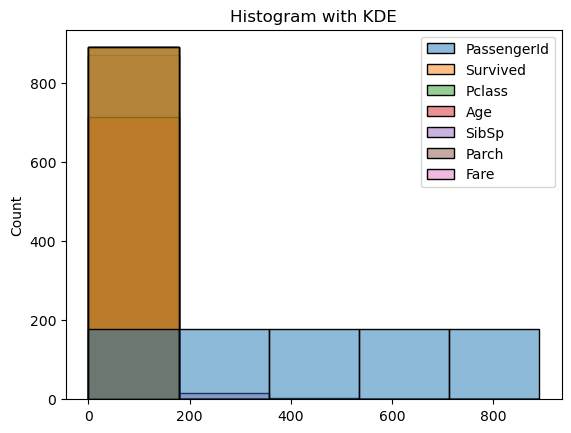

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_df, kde=False,bins=5)
plt.title('Histogram with KDE')
plt.show()


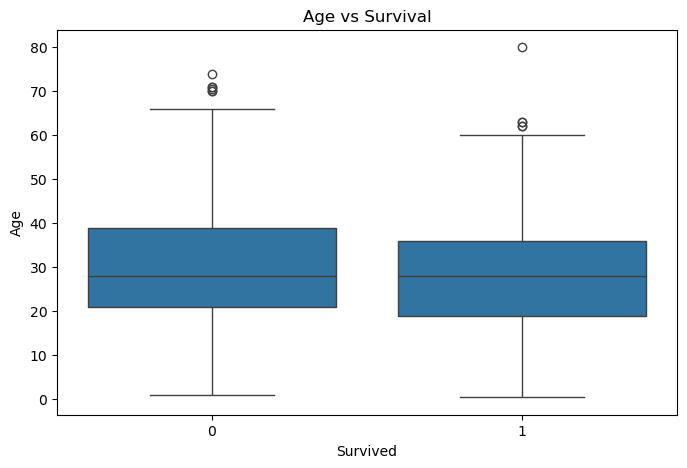

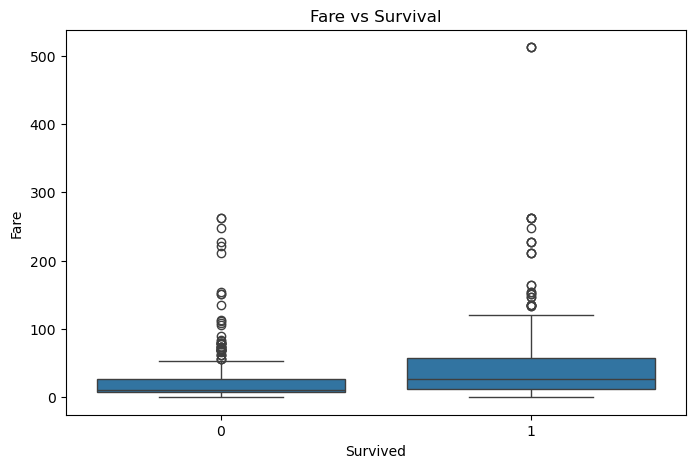

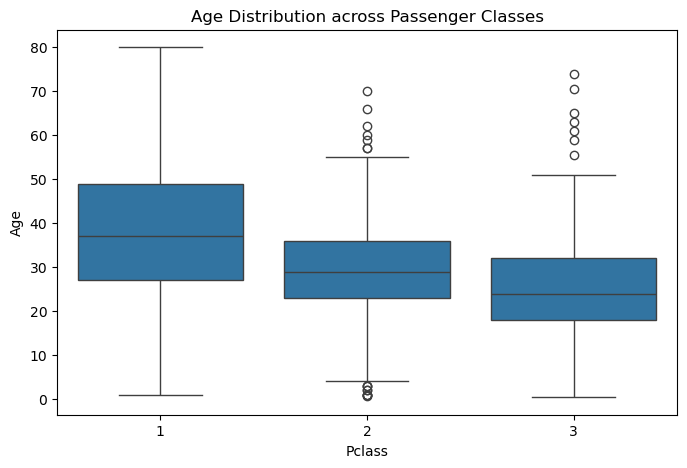

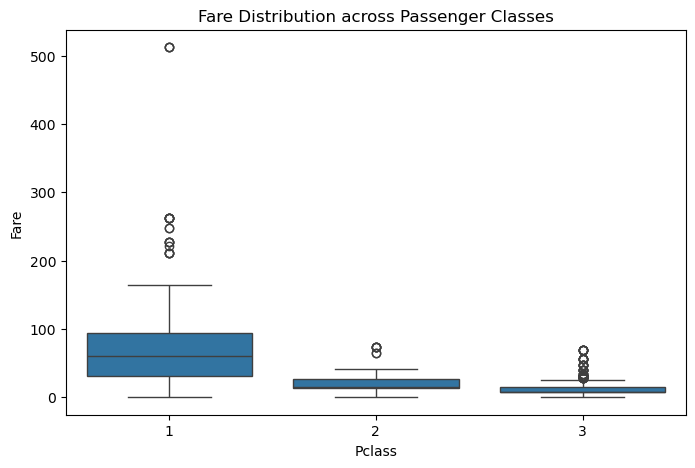

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age vs Survived
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Age", data=train_df)
plt.title("Age vs Survival")
plt.show()

# Fare vs Survived
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=train_df)
plt.title("Fare vs Survival")
plt.show()

# Age vs Pclass
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass", y="Age", data=train_df)
plt.title("Age Distribution across Passenger Classes")
plt.show()

# Fare vs Pclass
plt.figure(figsize=(8,5))
sns.boxplot(x="Pclass", y="Fare", data=train_df)
plt.title("Fare Distribution across Passenger Classes")
plt.show()

In [7]:
# Safer way (no warning, works in pandas 3.0+)
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())

train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])
test_df["Embarked"] = test_df["Embarked"].fillna(test_df["Embarked"].mode()[0])

test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())
train_df["Cabin"] = train_df["Cabin"].fillna("Unknown")
test_df["Cabin"] = test_df["Cabin"].fillna("Unknown")


In [8]:
test_df.isnull().sum()
train_df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ["Sex", "Embarked"]:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

In [10]:
# Select features
from sklearn.preprocessing  import StandardScaler
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_df[features]
y = train_df["Survived"]

# Scale numeric features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test_final = scaler.transform(test_df[features])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [13]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

In [14]:
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447552
ROC-AUC: 0.8818532818532818

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



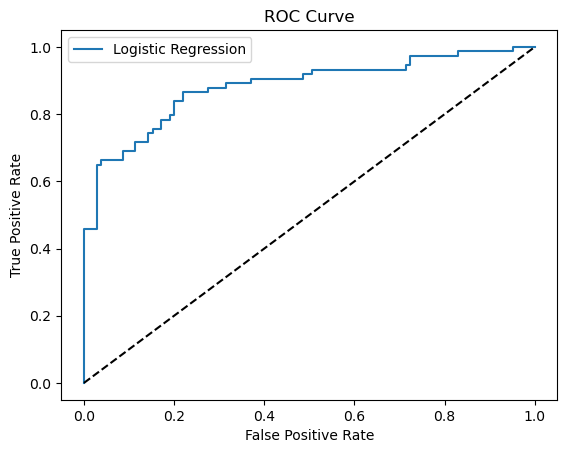

In [15]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [16]:
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
print(coefficients)

    Feature  Coefficient
5      Fare     0.121214
4     Parch    -0.100018
6  Embarked    -0.174770
3     SibSp    -0.328189
2       Age    -0.395757
0    Pclass    -0.792517
1       Sex    -1.285813


In [17]:
! pip install streamlit

In [ ]:
import joblib
joblib.dump(pipeline, "titanic_model_pipeline.pkl")


In [18]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import joblib

# Load trained pipeline
pipeline = joblib.load("titanic_logreg_pipeline.pkl")

st.set_page_config(page_title="Titanic Survival Predictor", page_icon="🚢")

st.title("🚢 Titanic Survival Prediction")
st.write("Fill in passenger details to predict survival probability.")

# Inputs
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.slider("Age", 0, 80, 25)
sibsp = st.number_input("Siblings/Spouses aboard", 0, 10, 0)
parch = st.number_input("Parents/Children aboard", 0, 10, 0)
fare = st.slider("Fare", 0, 500, 50)
embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

# DataFrame for model
input_df = pd.DataFrame([{
    "Pclass": pclass,
    "Sex": sex,
    "Age": age,
    "SibSp": sibsp,
    "Parch": parch,
    "Fare": fare,
    "Embarked": embarked
}])

# Predict
if st.button("Predict Survival"):
    pred = pipeline.predict(input_df)[0]
    prob = pipeline.predict_proba(input_df)[0][1]
    st.subheader("Result")
    if pred == 1:
        st.success(f"✅ Survived (Probability {prob:.2f})")
    else:
        st.error(f"❌ Did Not Survive (Probability {prob:.2f})")




Overwriting streamlit_app.py
